In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.cluster import rand_score
from sklearn.metrics.cluster import adjusted_rand_score

In [3]:
betas=np.loadtxt('Betares.csv',delimiter=',')

In [4]:
thetas=np.load('Thetares.npy')

In [5]:
#sgroup[i,j]表示第j组第i个样本的真实类别
sgroup=np.loadtxt('C:\\Users\\Administrator\\Desktop\\test\\SUBGROUP论文\\1000个样本测试\\样本生成\\sgroup.csv', delimiter = ',')

In [6]:
L=np.load('group.npy')

In [7]:
weight=[0.2,0.4,0.4]
mean=[-2.5,0,3]
covs=[1,0.7,1]#标准差
Theta=np.array([weight,mean,covs])
betat=np.array([0.3 , 0.5])
print('真实的beta:\n',betat,'\n','真实的Theta:\n',Theta)

真实的beta:
 [0.3 0.5] 
 真实的Theta:
 [[ 0.2  0.4  0.4]
 [-2.5  0.   3. ]
 [ 1.   0.7  1. ]]


In [8]:
np.mean(betas,axis=0)

array([0.30276405, 0.49819761])

In [9]:
np.mean(thetas,axis=0)

array([[ 0.22284353,  0.36604852,  0.41110795],
       [-2.31926334,  0.01510293,  2.94517496],
       [ 1.10403614,  0.66550833,  1.03864224]])

In [10]:
np.var(betas,axis=0)

array([0.00235723, 0.0023303 ])

In [11]:
np.var(thetas,axis=0)

array([[0.00059413, 0.00127216, 0.00067076],
       [0.03913912, 0.0041826 , 0.01252886],
       [0.01720011, 0.00473619, 0.00847285]])

In [12]:
np.sum((betas[:,1]-0.5)**2)/1000

0.002333551425851212

In [13]:
np.sum((thetas[:]-Theta)**2)/1000

0.14000071944949696

In [14]:
asd=thetas[:]-Theta

In [15]:
qwe=np.zeros((3,3))
for i in range(3):
    for j in range(3):
        qwe[i,j]=np.sum((asd[:,i,j]**2))/1000


In [16]:
qwe

array([[0.00111596, 0.00242486, 0.00079415],
       [0.07180486, 0.0044107 , 0.01553464],
       [0.02802362, 0.00592586, 0.00996607]])

In [17]:
np.sum((betas[:,1]-0.5)**2)/1000

0.002333551425851212

In [18]:
betas.shape

(1000, 2)

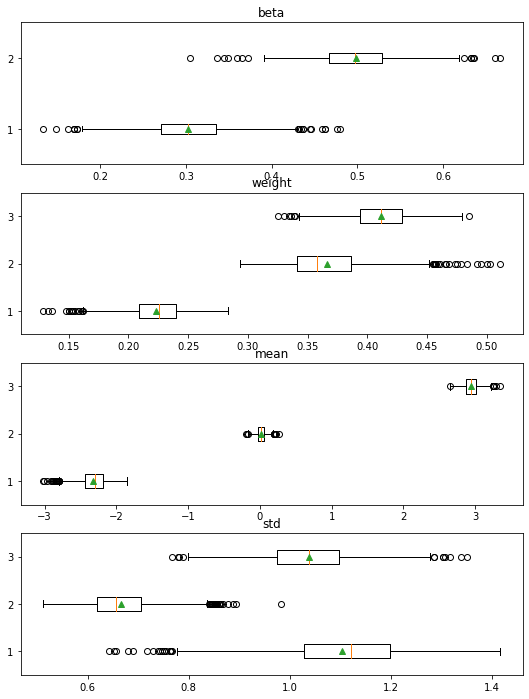

In [19]:
fig = plt.figure(figsize=(9,12))
ax0 = fig.add_subplot(411)
ax0.boxplot(betas,vert=False,showmeans=True )
ax1 = fig.add_subplot(412)
ax1.boxplot(thetas[:,0,:],vert=False,showmeans=True )
ax2 = fig.add_subplot(413)
ax2.boxplot(thetas[:,1,:],vert=False,showmeans=True )
ax3 = fig.add_subplot(414)
ax3.boxplot(thetas[:,2,:],vert=False,showmeans=True )
ax0.title.set_text('beta')
ax1.title.set_text('weight')
ax2.title.set_text('mean')
ax3.title.set_text('std')
plt.show()#显示图像


In [20]:
sgroup.shape

(500, 1000)

In [21]:
#L为矩阵，保存各样本对各类别的后验概率
L[0,0]

array([1.25389041e-04, 1.60270381e-03, 9.98271907e-01])

In [22]:
L[0,0].argmax()

2

In [23]:
Hclass=np.zeros((500,1000))#Hclass[i,j]表示第j组第i个样本的预测类别
for i in range(1000):
    for j in range(500):
        Hclass[j,i]=L[i,j].argmax()

In [24]:
Cratio=np.zeros((500,1000))
for i in range(500):
    for j in range(1000):
        if Hclass[i,j]==sgroup[i,j]:
            Cratio[i,j]=1

In [51]:
RIres=np.zeros(1000)
for i in range(1000):
    RIres[i]=rand_score(sgroup[:,i],Hclass[:,i])

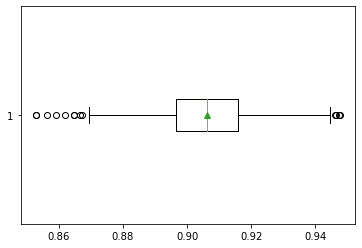

In [53]:
plt.boxplot(RIres,vert=False,showmeans=True )
plt.show()

In [25]:
cr=np.sum(Cratio,axis=0)/500

In [26]:
np.max(cr)

0.962

In [27]:
np.min(cr)

0.886

In [28]:
np.mean(cr)

0.927276

In [29]:
np.var(cr)

0.00013849982399999952

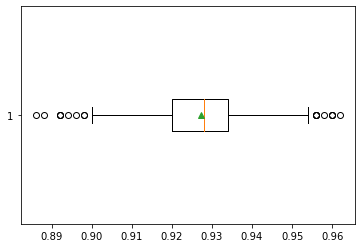

In [30]:
plt.boxplot(cr,vert=False,showmeans=True )
plt.show()